In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data
df = pd.read_csv(r'ratios_with_features.csv')
df.head()

,Date,ALB_ZBRA,ALB_ZBRA_RSI_14,ALB_ZBRA_SMA_10,ALB_ZBRA_SMA_20,ALB_ZBRA_SMA_60,DE_BXP,DE_BXP_RSI_14,DE_BXP_SMA_10,DE_BXP_SMA_20,...,PEG_O,PEG_O_RSI_14,PEG_O_SMA_10,PEG_O_SMA_20,PEG_O_SMA_60,SO_NLOK,SO_NLOK_RSI_14,SO_NLOK_SMA_10,SO_NLOK_SMA_20,SO_NLOK_SMA_60
0,2020-08-31,0.311845,53.506606,0.401902,0.40318,0.392237,2.548054,53.376443,3.24198,3.235732,...,0.882281,49.875527,0.961826,0.966244,0.968382,2.136432,52.240503,2.629768,2.620719,2.571855
1,2020-09-01,0.332974,53.506606,0.401902,0.40318,0.392237,2.687319,53.376443,3.24198,3.235732,...,0.855546,49.875527,0.961826,0.966244,0.968382,2.094566,52.240503,2.629768,2.620719,2.571855
2,2020-09-02,0.332368,53.506606,0.401902,0.40318,0.392237,2.629334,53.376443,3.24198,3.235732,...,0.872526,49.875527,0.961826,0.966244,0.968382,2.125291,52.240503,2.629768,2.620719,2.571855
3,2020-09-03,0.339772,53.506606,0.401902,0.40318,0.392237,2.534974,53.376443,3.24198,3.235732,...,0.848504,49.875527,0.961826,0.966244,0.968382,2.210971,52.240503,2.629768,2.620719,2.571855
4,2020-09-04,0.356920,53.506606,0.401902,0.40318,0.392237,2.536138,53.376443,3.24198,3.235732,...,0.854765,49.875527,0.961826,0.966244,0.968382,2.152835,52.240503,2.629768,2.620719,2.571855


In [4]:
df.tail(2)

,Date,ALB_ZBRA,ALB_ZBRA_RSI_14,ALB_ZBRA_SMA_10,ALB_ZBRA_SMA_20,ALB_ZBRA_SMA_60,DE_BXP,DE_BXP_RSI_14,DE_BXP_SMA_10,DE_BXP_SMA_20,...,PEG_O,PEG_O_RSI_14,PEG_O_SMA_10,PEG_O_SMA_20,PEG_O_SMA_60,SO_NLOK,SO_NLOK_RSI_14,SO_NLOK_SMA_10,SO_NLOK_SMA_20,SO_NLOK_SMA_60
495,2022-08-18,0.816374,71.023896,0.787320,0.743417,0.726621,4.22249,84.923331,4.066078,3.890556,...,0.950678,70.818014,0.912748,0.895332,0.924113,3.371537,68.048883,3.251391,3.11834,3.085444
496,2022-08-19,0.822204,72.022105,0.797792,0.750632,0.727793,4.28095,86.404524,4.097696,3.928286,...,0.951858,71.136198,0.918957,0.900666,0.923202,3.405268,69.678160,3.273866,3.14765,3.090878


In [5]:
df.shape

(497, 36)

In [6]:
# we check first chosen ratios first (here: ALB_ZBRA)
df_small=df.iloc[:,:6]
df_small.head()

,Date,ALB_ZBRA,ALB_ZBRA_RSI_14,ALB_ZBRA_SMA_10,ALB_ZBRA_SMA_20,ALB_ZBRA_SMA_60
0,2020-08-31,0.311845,53.506606,0.401902,0.40318,0.392237
1,2020-09-01,0.332974,53.506606,0.401902,0.40318,0.392237
2,2020-09-02,0.332368,53.506606,0.401902,0.40318,0.392237
3,2020-09-03,0.339772,53.506606,0.401902,0.40318,0.392237
4,2020-09-04,0.356920,53.506606,0.401902,0.40318,0.392237


In [7]:
df_small.shape

(497, 6)

In [8]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             497 non-null    object 
 1   ALB_ZBRA         497 non-null    float64
 2   ALB_ZBRA_RSI_14  497 non-null    float64
 3   ALB_ZBRA_SMA_10  497 non-null    float64
 4   ALB_ZBRA_SMA_20  497 non-null    float64
 5   ALB_ZBRA_SMA_60  497 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.4+ KB


## Splitting Data in Train and Validation

In [9]:
length_data = len(df_small)    
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length:", length_train)
print("Validation data lenth:", length_validation)

Data length : 497
Train data length: 348
Validation data lenth: 149


In [11]:
# train_data
train_data = df_small[:length_train].iloc[:,:6] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,ALB_ZBRA,ALB_ZBRA_RSI_14,ALB_ZBRA_SMA_10,ALB_ZBRA_SMA_20,ALB_ZBRA_SMA_60
0,2020-08-31,0.311845,53.506606,0.401902,0.403180,0.392237
1,2020-09-01,0.332974,53.506606,0.401902,0.403180,0.392237
2,2020-09-02,0.332368,53.506606,0.401902,0.403180,0.392237
3,2020-09-03,0.339772,53.506606,0.401902,0.403180,0.392237
4,2020-09-04,0.356920,53.506606,0.401902,0.403180,0.392237
...,...,...,...,...,...,...
343,2022-01-10,0.422384,54.361802,0.407593,0.400044,0.432223
344,2022-01-11,0.444326,62.093913,0.413192,0.401806,0.432275
345,2022-01-12,0.446099,62.644562,0.419260,0.403410,0.432256
346,2022-01-13,0.445756,62.455690,0.424758,0.405760,0.432285


In [12]:
# validation_data
validation_data = df_small[length_train:].iloc[:,:6]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,ALB_ZBRA,ALB_ZBRA_RSI_14,ALB_ZBRA_SMA_10,ALB_ZBRA_SMA_20,ALB_ZBRA_SMA_60
348,2022-01-18,0.436370,57.179284,0.432971,0.410736,0.432234
349,2022-01-19,0.426604,52.064280,0.434497,0.413027,0.432074
350,2022-01-20,0.431503,54.273909,0.435585,0.415356,0.431810
351,2022-01-21,0.428953,52.906871,0.436594,0.417472,0.431507
352,2022-01-24,0.430432,53.636661,0.435338,0.419499,0.431261
...,...,...,...,...,...,...
492,2022-08-15,0.813028,70.504616,0.762595,0.722713,0.722300
493,2022-08-16,0.814154,70.669445,0.768577,0.729514,0.723594
494,2022-08-17,0.815450,70.871029,0.776736,0.736559,0.725092
495,2022-08-18,0.816374,71.023896,0.787320,0.743417,0.726621


## Creating Train Dataset from Train split

In [13]:
dataset_train = train_data.iloc[:,:6] .values
dataset_train.shape

(348, 6)

In [14]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2088, 1)

## Normalization / Feature Scaling

In [13]:
# Dataset values will be in between 0 and 1 after scaling

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

___

scaler.fit(dataset_train.iloc[:,1:] # Fit scaler to features

dataset_train.iloc[:,1:] = scaler.transform(dataset_train.iloc[:,1:]) #Scale

dataset_train.head()
____

# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

SyntaxError: invalid syntax (550910902.py, line 8)

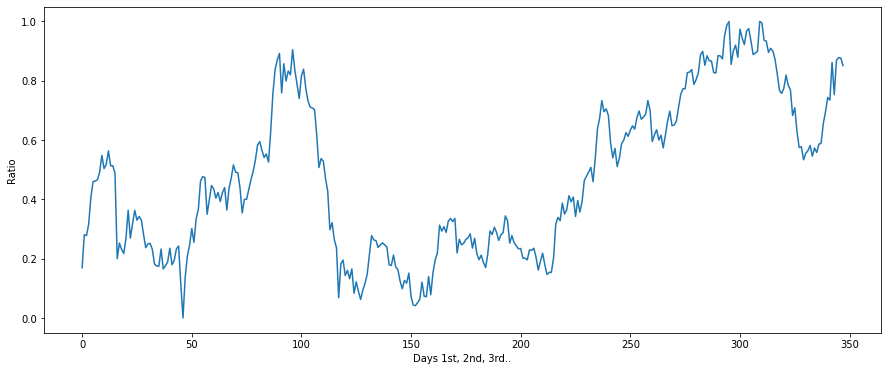

In [15]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days 1st, 2nd, 3rd..")
plt.ylabel("Ratio")
plt.show()

## Creating X_train and y_train from Train data

We have train data composed of ratios over days

So, it has 1184 ratios corresponding 1184 days

My aim is to predict the ratio (closing) of the next day.

I can use a time step of 2 days.

I will pick first 2 ratios (day 0 to 2), 1st 2 ratio will be in 
X_train data

Then predict the ratio of 3rd day; and 3rd ratio will be in y_train data

Again, i will pick ratios from 1 to 3, those will be in X_train data

Then predict the next days ratio, 4th ratio will be in y_train data



In [16]:
#question: which time step makes sense?

X_train = []
y_train = []

time_step = 2 #change that?

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
dataset_train_scaled[i-time_step:i]

array([[0.8783648 ],
       [0.87655523]])

In [18]:
dataset_train_scaled[i,0]

0.8512020362332713

In [19]:
print("Shape of X_train before reshape:",X_train.shape)
print("Shape of y_train before reshape:",y_train.shape)

Shape of X_train before reshape: (346, 2)
Shape of y_train before reshape: (346,)


In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (346, 2, 1)
Shape of y_train after reshape : (346, 1)


In [21]:
X_train[0]

array([[0.16942742],
       [0.28100047]])

In [22]:
X_train = X_train[:int(X_train.shape[0]*0.95)]
X_val = X_train[int(X_train.shape[0]*0.95):]
y_train = y_train[:int(y_train.shape[0]*0.95)]
y_val = y_train[int(y_train.shape[0]*0.95):]

Check the first item in y_train
It is the ratio of 2nd day (timestep 2)

In [23]:
y_train[0]

array([0.27779767])

## Creating RNN model

## Creating mixed model

## Evaluating Model

## Model predictions for train data¶


## Creating Test Dataset from Validation Data

In [ ]:
#Converting array and scaling
dataset_validation = validation_data.ALB_ZBRA.values  # getting "Ratio" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling  values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

In [ ]:
#Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

In [ ]:
#reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

## Evaluating with Validation Data

In [ ]:
regressor.evaluate(X_test, y_test)

In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.ALB_ZBRA, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.ALB_ZBRA, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("ratio")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## Creating LSTM Model

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mean_squared_error", optimizer = "rmsprop", metrics = ["mae", "mape"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

In [ ]:
### loss seems ok but mape is really high. how to improve?

## Evaluating LSTM Model

In [ ]:
model_lstm.evaluate(X_test, y_test)

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [18]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

NameError: name 'regressor' is not defined

## Future price prediction

In [ ]:
#last day in our data?
df.iloc[-1]

### We can predict the ratio for the day after 2022-08-23--> for 2022-08-24.
We will use last ratios as input of our model for this prediction.

In [ ]:
X_input = df.iloc[-time_step:].ALB_ZBRA.values             # getting last rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))     # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,time_step,1))                    # reshaping: converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, prediction for 2022-08-24:", simple_RNN_prediction[0,0])
print("LSTM, prediction for 2022-08-24:", LSTM_prediction[0,0])